<a href="https://colab.research.google.com/github/JadeGome/Happiness/blob/main/Project_2%2C_Part_2_JadeGomez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of Happiness scores through different variables. Each code has a fit of happiness score with family, health, freedom, and economy. If there is a higher correlation between the two variables, we can see that a varible has a impact on how happy a person can be. Using a Multiple Linear Regression model we can see that the most important variables that affect happiness is family, freedom, health, and economy. 

In [124]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

url = 'https://raw.githubusercontent.com/JadeGome/Happiness/main/output%20(1).csv'
Happy = pd.read_csv(url)
Happy.dropna(subset=['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'year'], inplace=True)
Happy.dropna(axis=1, inplace=True)
Happy.rename(columns={"Economy (GDP per Capita)":"Economy","Health (Life Expectancy)": "Health", "Trust (Government Corruption)": "Trust"}, inplace=True)
Happy.drop(columns=['Unnamed: 0'])
Happy=Happy.loc[Happy['year']==2015]



In [65]:
pearson_coef, p_value = stats.pearsonr(Happy['Happiness Score'], Happy['Family'])
print('The Pearson Correlation Coefficient is', pearson_coef,'with a P-value')

The Pearson Correlation Coefficient is 0.7406051972367851 with a P-value


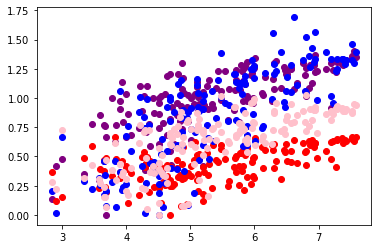

In [67]:
plt.scatter(Happy['Happiness Score'], Happy['Family'], c=['purple'])
plt.scatter(Happy['Happiness Score'], Happy['Freedom'], c='red')
plt.scatter(Happy['Happiness Score'], Happy['Economy'], c='blue')
plt.scatter(Happy['Happiness Score'], Happy['Health'], c='pink')


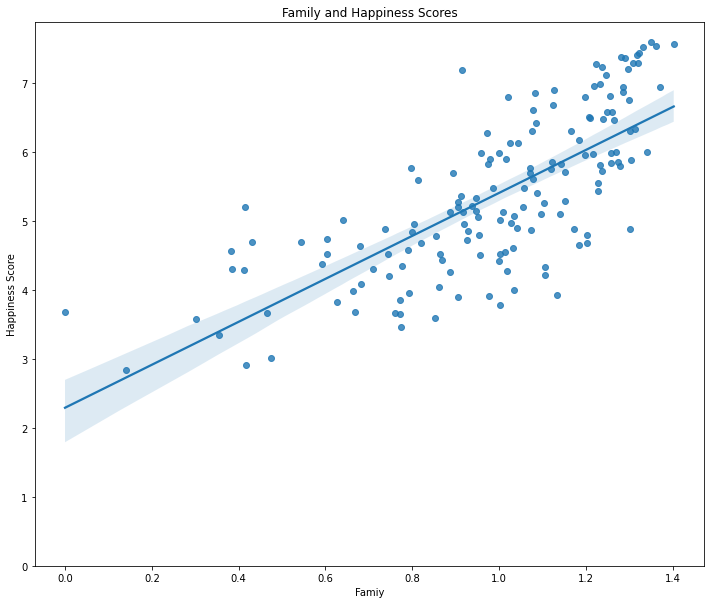

In [83]:
plt.figure(figsize=(width, height))
sns.regplot(x="Family", y="Happiness Score", data=Happy)
plt.ylim(0,)

plt.title('Family and Happiness Scores')
plt.xlabel('Famiy')
plt.ylabel('Happiness Score')


plt.show()
plt.close()

In [84]:
lm = LinearRegression()
lm

H = Happy[['Family', 'Freedom', 'Economy', 'Health']]
lm.fit(H, Happy['Happiness Score'])

LinearRegression()

In [85]:
lm.intercept_

1.8963411367389176

In [86]:
lm.coef_

array([1.35810555, 1.77071357, 0.88258756, 0.99594485])

In [87]:
Y_hat= lm.predict(H)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


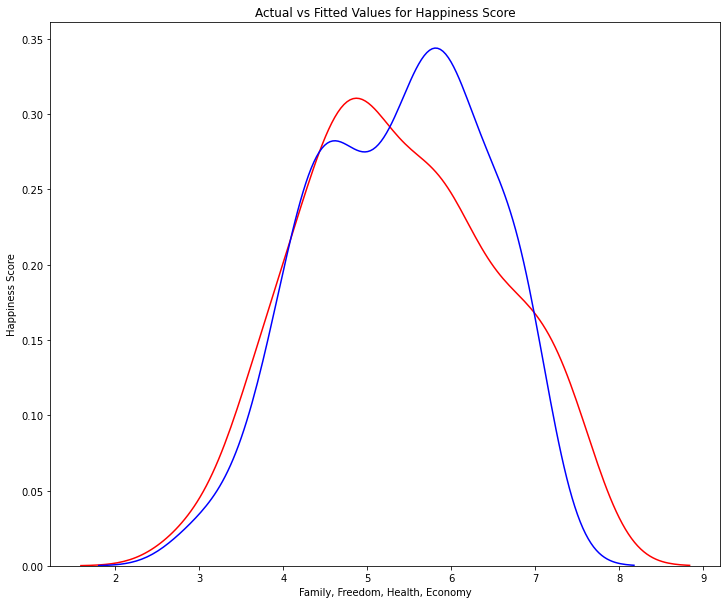

In [123]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(Happy['Happiness Score'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Happiness Score')
plt.xlabel('Family, Freedom, Health, Economy')
plt.ylabel('Happiness Score')

plt.show()
plt.close()

In [93]:
lm.fit(H, Happy['Happiness Score'])
print('The R-squared is:', lm.score(H, Happy['Happiness Score']))

The R-squared is: 0.7699839204155499


In [94]:
Yhat=lm.predict(H)
print('The output of the first four predicted value is:', Yhat[0:4])

The output of the first four predicted value is: [7.0778067  7.00749685 6.93496373 7.05912731]


In [98]:
mse= mean_squared_error(Happy['Happiness Score'], Yhat)
print('The mean square error of Happiness Score and predicted value is:', mse)

The mean square error of Happiness Score and predicted value is: 0.2996535478891408
